# Let's Grow More Data Science Virtual Internship Program May 2023

# LGMVIP June 2023

## BY: S. MADHESH

### BEGINNER LEVEL TASK


## TASK 1: Iris Flowers Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

### Dataset Link: http://archive.ics.uci.edu/ml/machine-learning-databases/iris

### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                          names = ['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm',
                                   'petal_width_in_cm','categories_of_flower'] )

In [21]:
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.dtypes

sepal_length_in_cm      float64
sepal_width_in_cm       float64
petal_length_in_cm      float64
petal_width_in_cm       float64
categories_of_flower     object
dtype: object

In [24]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [25]:
df.shape

(150, 5)

In [26]:
df.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'categories_of_flower'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length_in_cm    150 non-null    float64
 1   sepal_width_in_cm     150 non-null    float64
 2   petal_length_in_cm    150 non-null    float64
 3   petal_width_in_cm     150 non-null    float64
 4   categories_of_flower  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.isnull().sum()

sepal_length_in_cm      0
sepal_width_in_cm       0
petal_length_in_cm      0
petal_width_in_cm       0
categories_of_flower    0
dtype: int64

## Data Visualisation

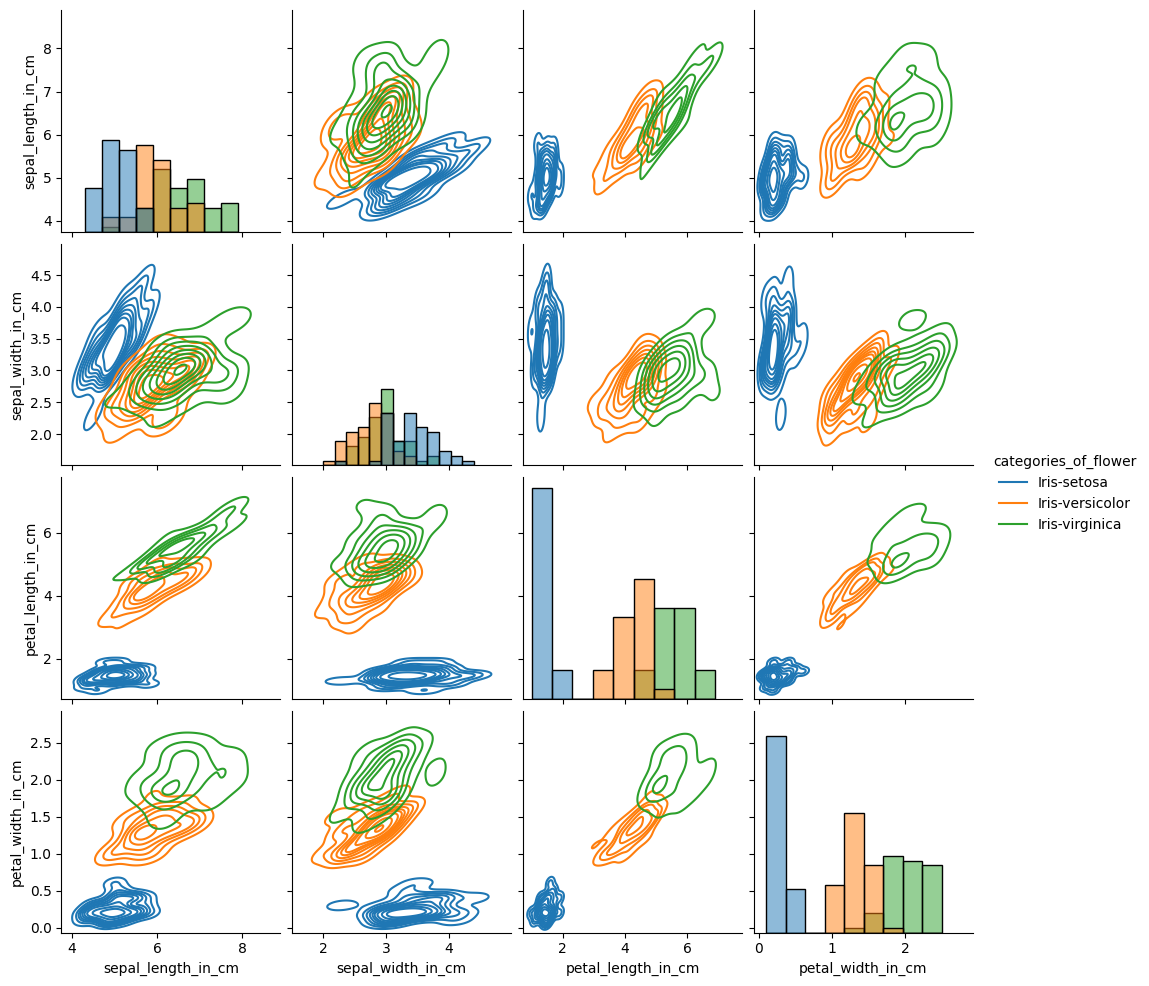

In [30]:
sns.pairplot(df, hue = "categories_of_flower", kind = 'kde', diag_kind = 'hist')

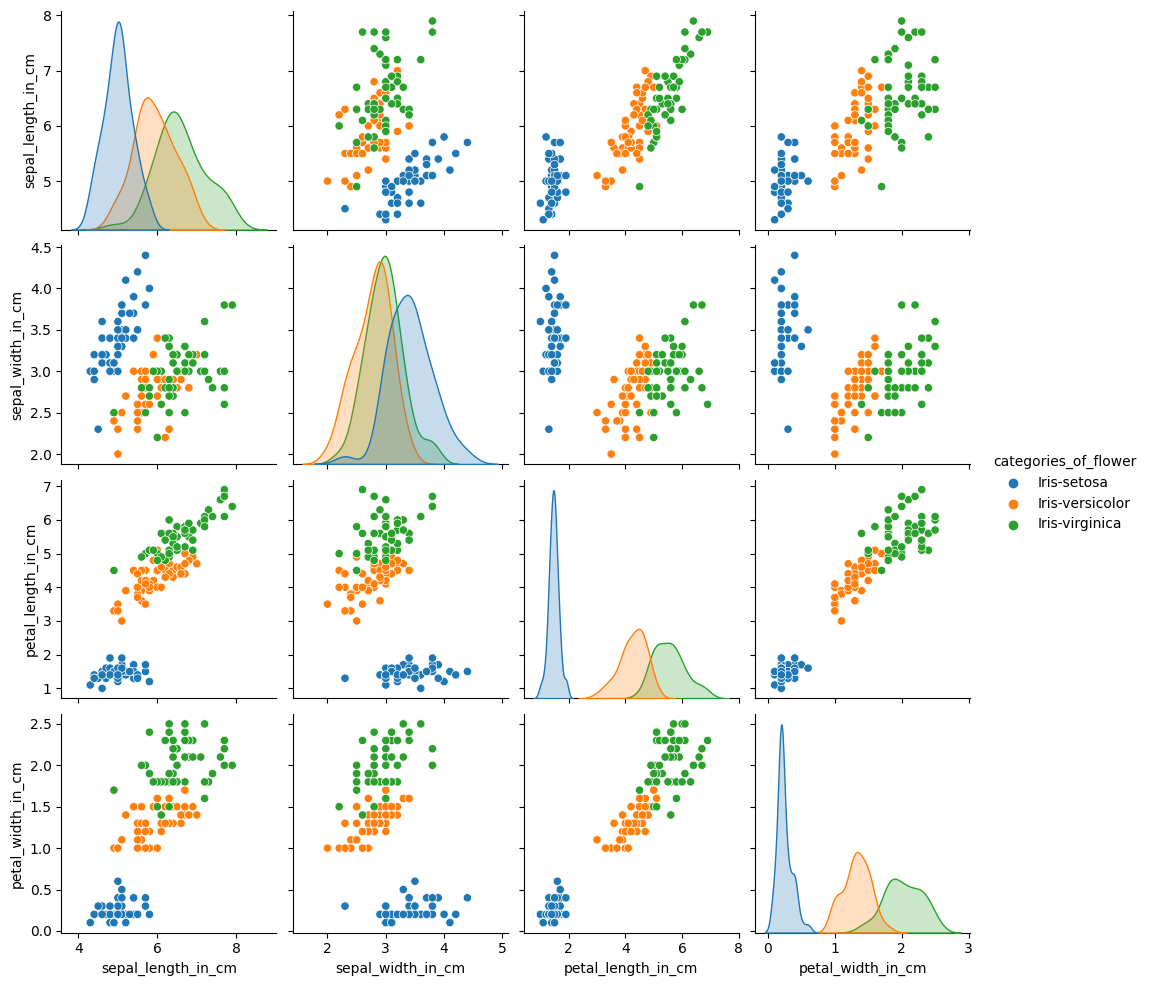

In [31]:
sns.pairplot(df,hue = "categories_of_flower" )

<Axes: xlabel='sepal_width_in_cm', ylabel='petal_width_in_cm'>

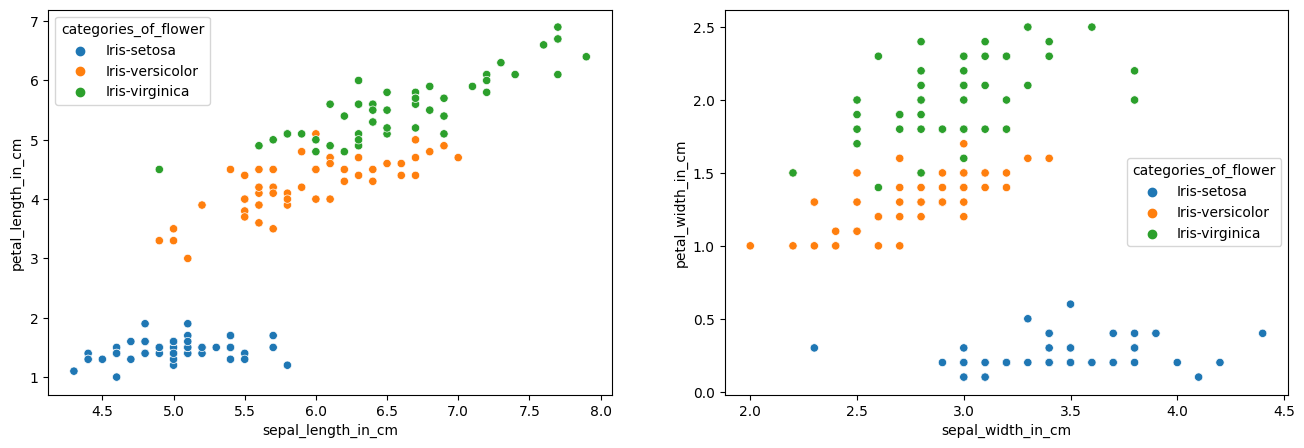

In [32]:
fig,(rect1, rect2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x = "sepal_length_in_cm", y= "petal_length_in_cm", data = df, hue = "categories_of_flower",ax = rect1)
sns.scatterplot(x = "sepal_width_in_cm", y = "petal_width_in_cm", data = df, hue = "categories_of_flower", ax = rect2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: ylabel='petal_width_in_cm'>

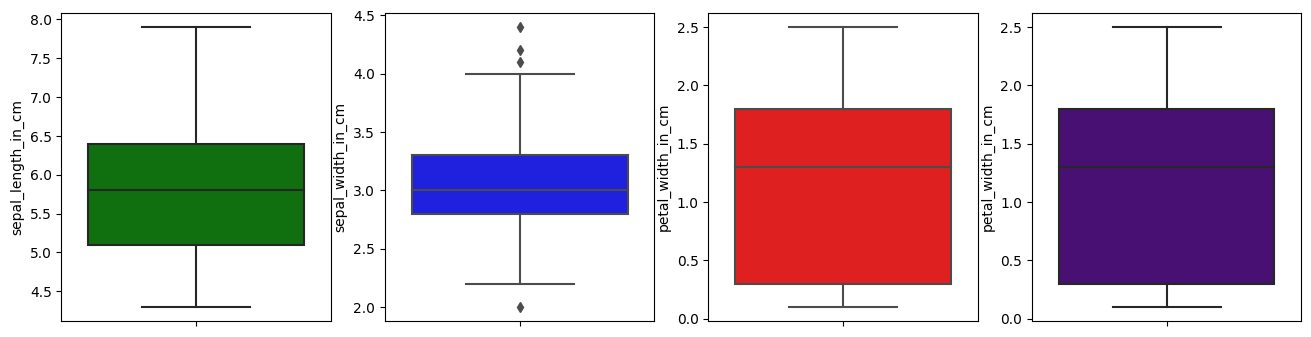

In [37]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='sepal_length_in_cm', color = 'green')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='sepal_width_in_cm',color='blue')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='petal_width_in_cm',color='red')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='petal_width_in_cm',color= 'indigo')

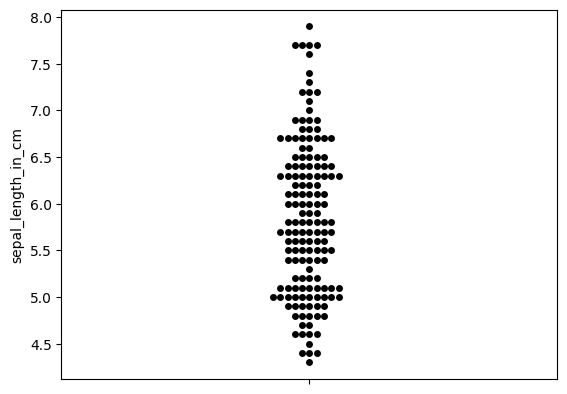

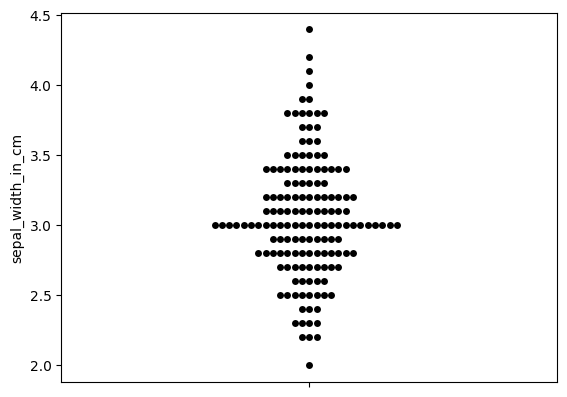

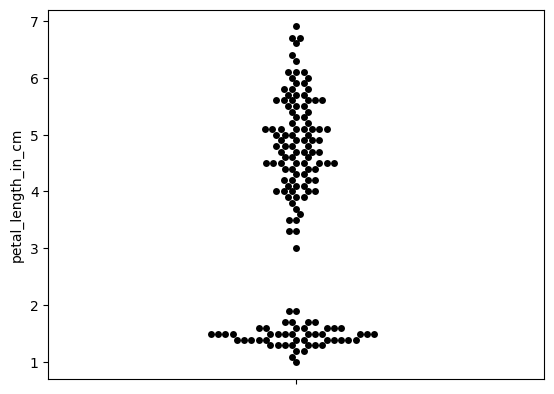

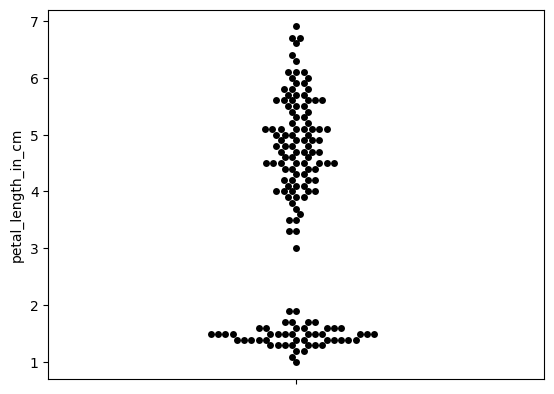

In [39]:
sns.swarmplot(data = df, y = "sepal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = df, y = "sepal_width_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = df, y = "petal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()
sns.swarmplot(data = df, y = "petal_length_in_cm", edgecolor = "yellow", color = "black" )
plt.show()

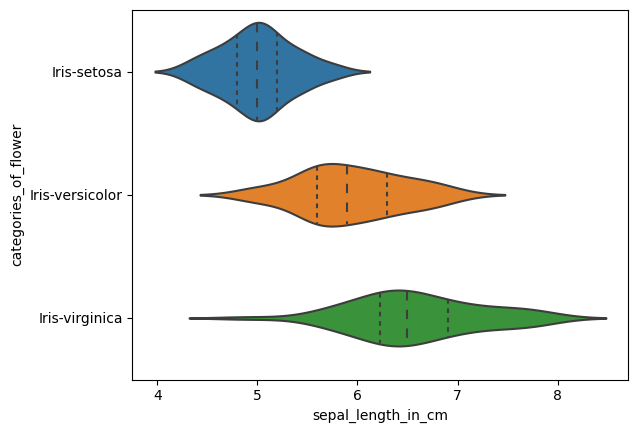

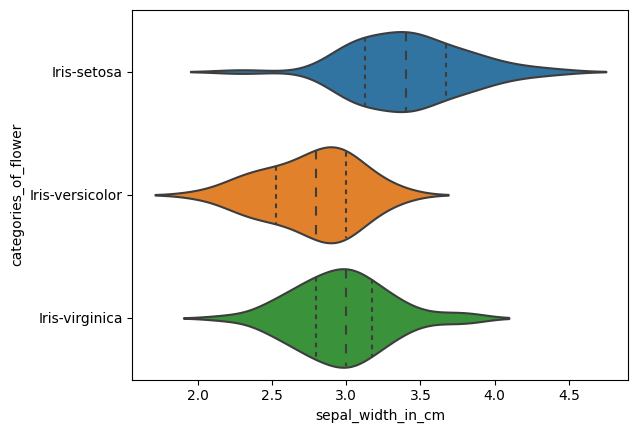

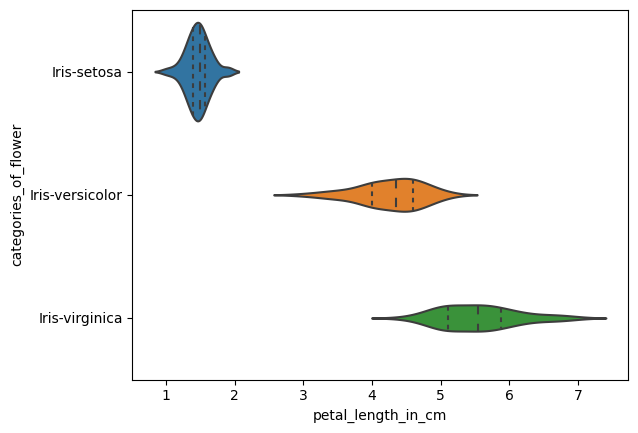

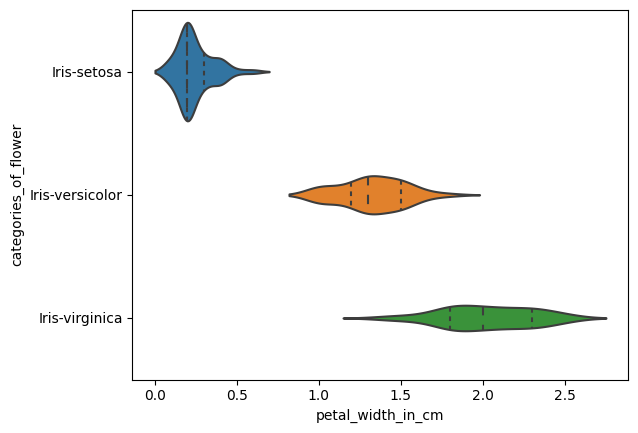

In [40]:
sns.violinplot(y='categories_of_flower', x='sepal_length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='sepal_width_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='petal_length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='categories_of_flower', x='petal_width_in_cm', data=df, inner='quartile')
plt.show()

<ipython-input-41-c179a18ec251>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


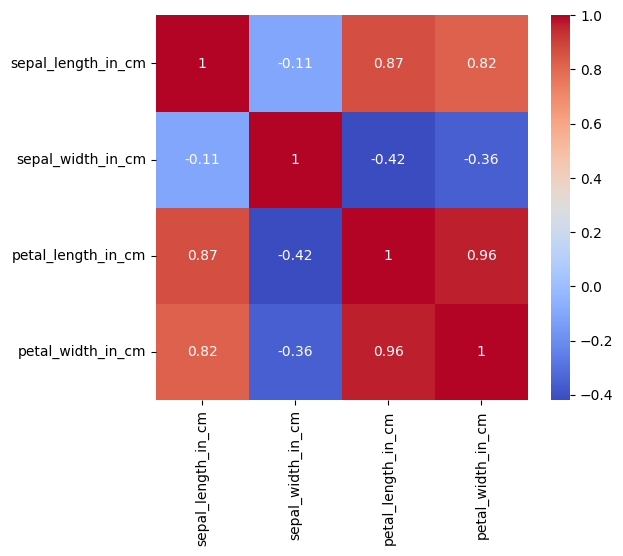

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

## Building Model, Training and Testing

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df['categories_of_flower'] = le.fit_transform = (df['categories_of_flower'])
df.head(10)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['categories_of_flower'])
Y = df['categories_of_flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

## Logistic Regression

In [48]:
logistic_model= LogisticRegression(max_iter=1000)

In [49]:
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [50]:
y_pred=logistic_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [51]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    cm = confusion_matrix(y_test, preds, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



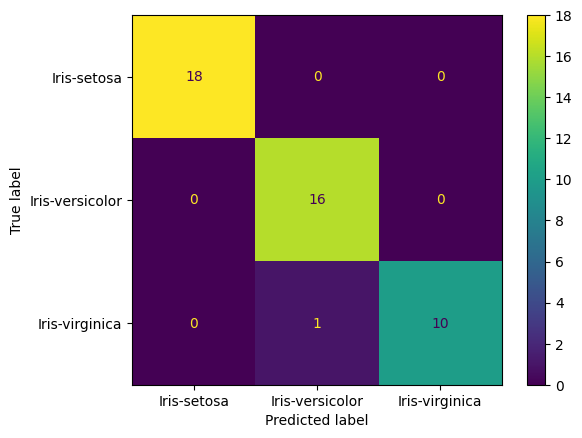

Accuracy: 97.78%


In [52]:
print('Logistic Regression')
report(logistic_model)
print(f'Accuracy: {round(score*100,2)}%')

## Decision Tree Classifier

In [53]:
decision_tree_model = DecisionTreeClassifier()

In [54]:
decision_tree_model = decision_tree_model.fit(x_train, y_train)

In [55]:
y_pred= decision_tree_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.92        45
   weighted avg       0.94      0.93      0.93        45



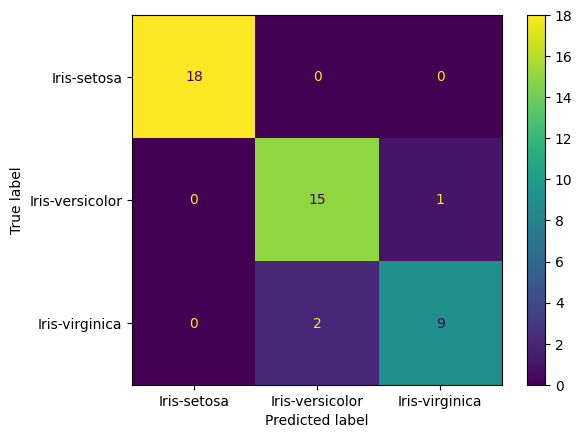

Accuracy: 93.33%


In [56]:
print('Decision Tree Classifier')
report(decision_tree_model)
print(f'Accuracy: {round(score*100,2)}%')

## Liner SVC [ Support Vector Classifier ]

In [57]:
svc_model = SVC()
svc_model.fit(x_train,y_train)
L_svc_model=LinearSVC()

In [58]:
L_svc_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [59]:
y_pred=L_svc_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Linear Support Vector Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



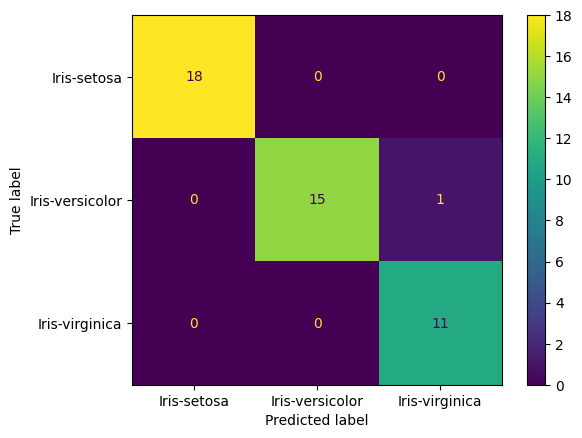

Accuracy: 97.78%


In [60]:
print('Linear Support Vector Classifier')
report(L_svc_model)
print(f'Accuracy: {round(score*100,2)}%')


## Naive Bayes

In [61]:
naive_model = MultinomialNB()

In [62]:
naive_model.fit(x_train, y_train)

MultinomialNB()

In [63]:
y_pred= naive_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

Naive Bayes
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



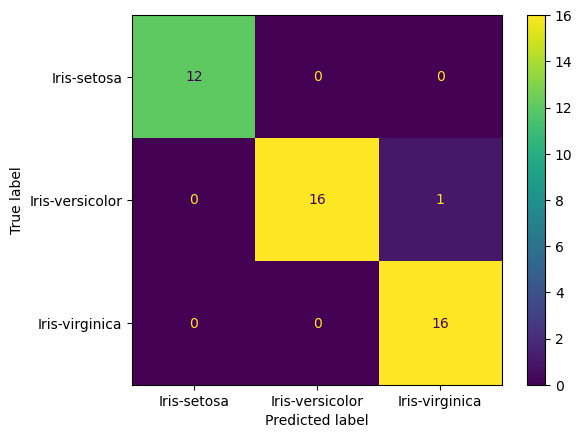

Accuracy: 97.78%


In [ ]:
print('Naive Bayes')
report(naive_model)
print(f'Accuracy: {round(score*100,2)}%')

## K - Nearest Neighbours [ KNN ]

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [65]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [67]:
y_pred= knn_model.predict(x_test)
score=accuracy_score(y_test,y_pred)

K - Nearest Neighbours [ KNN]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



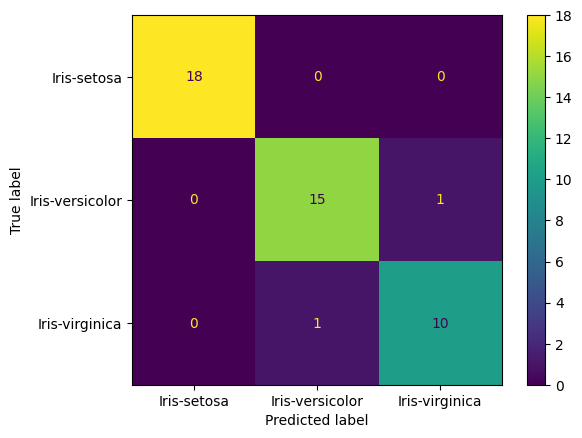

Accuracy: 95.56%


In [68]:
print('K - Nearest Neighbours [ KNN]')
report(knn_model)
print(f'Accuracy: {round(score*100,2)}%')

## All Algorithms Accuracy Chart

In [69]:
details = { 'Regression':['Logistic Regression','Decision Tree','Linear SVC','Naive Bayes', 'KNN'],
    'Accuracy':[logistic_model.score(x_test,y_test),decision_tree_model.score(x_test,y_test),L_svc_model.score(x_test,y_test),naive_model.score(x_test,y_test),knn_model.score(x_test,y_test)]}

In [71]:
data_nparray = np.array([['Logistic Regression', logistic_model.score(x_test,y_test)],
                          ['Decision Tree',decision_tree_model.score(x_test,y_test)],
                         ['Linear SVC', L_svc_model.score(x_test,y_test)],
                         ['Naive Bayes',naive_model.score(x_test,y_test)],
                         ['KNN',knn_model.score(x_test,y_test)]])


print_details = pd.DataFrame(columns=[ 'Regression', 'Accuracy'],data=data_nparray)
print_details

,Regression,Accuracy
0,Logistic Regression,0.9777777777777777
1,Decision Tree,0.9333333333333333
2,Linear SVC,0.9777777777777777
3,Naive Bayes,0.7333333333333333
4,KNN,0.9555555555555556


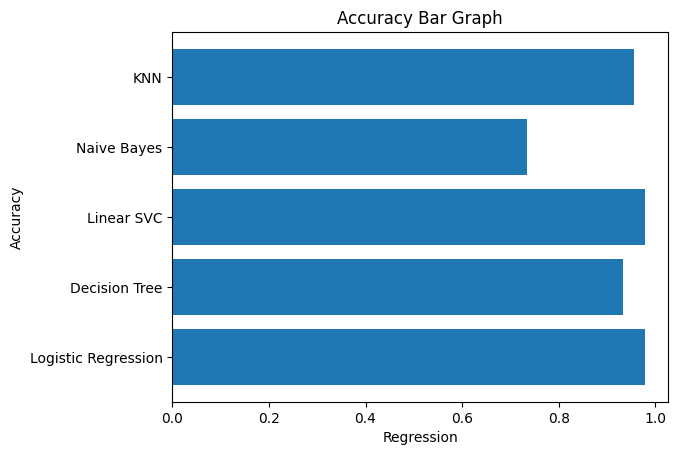

In [72]:
x_axis = ['Logistic Regression','Decision Tree','Linear SVC', 'Naive Bayes', 'KNN']
y_axis = [logistic_model.score(x_test,y_test),decision_tree_model.score(x_test,y_test),L_svc_model.score(x_test,y_test),naive_model.score(x_test,y_test),knn_model.score(x_test,y_test)]
plt.barh(x_axis,y_axis)
plt.xlabel('Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy Bar Graph')
plt.show()